In [1]:
import pysam
import os.path
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches
sns.set(font_scale=2)
sns.set_style("white")
%matplotlib inline

In [59]:
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn import decomposition

In [60]:
lfmm_dom_in = pd.read_csv(os.path.join('results','batch_4','LFMM','complete.dom.lfmm'),sep = ' ', header = None)
lfmm_dom_in.columns = [x+1 for x in lfmm_dom_in.columns]
lfmm_dom_in.head()

,1,2,3,4,5,6,7,8,9,10,...,35570,35571,35572,35573,35574,35575,35576,35577,35578,35579
0,1,1,1,1,1,1,1,1,0,1,...,1,0,0,1,0,1,0,1,0,0
1,0,1,1,1,1,1,1,0,0,1,...,9,9,0,1,0,1,0,1,0,0
2,0,1,1,1,1,1,1,1,0,1,...,1,0,0,1,0,1,9,9,9,9
3,0,1,1,1,1,1,1,0,0,1,...,1,0,0,1,9,9,0,0,1,0
4,0,1,0,1,0,1,1,1,0,1,...,1,0,0,1,0,1,9,9,9,9


#### replace 9 with missing

In [61]:
allele_matrix = lfmm_dom_in.replace(9, np.nan)

In [62]:
allele_matrix = allele_matrix.values.astype(np.float)
allele_matrix

array([[  1.,   1.,   1., ...,   1.,   0.,   0.],
       [  0.,   1.,   1., ...,   1.,   0.,   0.],
       [  0.,   1.,   1., ...,  nan,  nan,  nan],
       ..., 
       [  1.,   1.,   0., ...,   1.,   0.,   1.],
       [  0.,   1.,   0., ...,   0.,   0.,   1.],
       [  0.,   1.,   1., ...,   1.,   0.,   0.]])

In [63]:
imp = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
imp_allele_matrix = imp.fit_transform(allele_matrix)

In [64]:
pd.DataFrame(imp_allele_matrix).head()

,0,1,2,3,4,5,6,7,8,9,...,35569,35570,35571,35572,35573,35574,35575,35576,35577,35578
0,1,1,1,1,1,1,1,1,0,1,...,1.00000,0.000000,0,1,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
1,0,1,1,1,1,1,1,0,0,1,...,0.93865,0.355828,0,1,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
2,0,1,1,1,1,1,1,1,0,1,...,1.00000,0.000000,0,1,0.000000,1.000000,0.245399,0.625767,0.380368,0.423313
3,0,1,1,1,1,1,1,0,0,1,...,1.00000,0.000000,0,1,0.174699,0.981928,0.000000,0.000000,1.000000,0.000000
4,0,1,0,1,0,1,1,1,0,1,...,1.00000,0.000000,0,1,0.000000,1.000000,0.245399,0.625767,0.380368,0.423313


In [65]:
ped_genotypes = '/home/ipseg/Desktop/waples/chum_populations/data/batch_4/pop_genotypes/non_paralogs.ped'
ped_genotypes = pd.read_csv(ped_genotypes, sep = ' ', header = None)
ped_genotypes = ped_genotypes.iloc[:,:2]
ped_genotypes.columns = ['pop', 'ind']
ped_genotypes.head()

,pop,ind
0,1,CMHAMM10_0002
1,1,CMHAMM10_0005
2,1,CMHAMM10_0008
3,1,CMHAMM10_0011
4,1,CMHAMM10_0012


In [103]:
nmf = decomposition.NMF(init = 'nndsvd', n_components = 5, max_iter = 1000, alpha = .5, l1_ratio = .5)
nmf_fit = nmf.fit(imp_allele_matrix.T)

In [99]:
nmf_fit.components_.shape

(5, 35579)

In [98]:
pd.DataFrame(nmf_fit.components_)

,0,1,2,3,4,5,6,7,8,9,...,35569,35570,35571,35572,35573,35574,35575,35576,35577,35578
0,0.015320,0.072258,0.020713,0.077325,0.000000,0.075902,0.055159,0.061054,0.013442,0.075831,...,0.072541,0.050568,0.000000,0.079727,0.000000,0.077733,0.017430,0.062337,0.004925,0.049263
1,0.017458,0.089925,0.060182,0.090122,0.041522,0.087612,0.091710,0.012396,0.054028,0.072957,...,0.084912,0.009040,0.000073,0.085170,0.009605,0.089857,0.002914,0.057018,0.036638,0.029750
2,0.031807,0.108509,0.101564,0.109861,0.000000,0.071266,0.070335,0.104197,0.039482,0.109031,...,0.100842,0.051438,0.000000,0.115387,0.023827,0.113621,0.045005,0.054382,0.061351,0.055656
3,0.021612,0.082731,0.060502,0.082717,0.000000,0.057427,0.051339,0.070213,0.038058,0.079220,...,0.080133,0.029108,0.002912,0.079047,0.014008,0.082693,0.018505,0.065588,0.018222,0.038420
4,0.017216,0.103597,0.050376,0.098347,0.002864,0.095740,0.056166,0.077118,0.063580,0.086124,...,0.097777,0.026436,0.066020,0.077151,0.029663,0.090441,0.023465,0.059566,0.042508,0.024649


In [102]:
comps = pd.concat([ped_genotypes, pd.DataFrame(nmf_fit.components_.T)], axis = 1)
comps = comps.rename(columns = {0:'first', 1:'second', 2:'third', 3:'fourth', 4:'fifth', 5:'sixth' })
comps.head()

,pop,ind,first,second,third,fourth,fifth
0,1,CMHAMM10_0002,0.015320,0.017458,0.031807,0.021612,0.017216
1,1,CMHAMM10_0005,0.072258,0.089925,0.108509,0.082731,0.103597
2,1,CMHAMM10_0008,0.020713,0.060182,0.101564,0.060502,0.050376
3,1,CMHAMM10_0011,0.077325,0.090122,0.109861,0.082717,0.098347
4,1,CMHAMM10_0012,0.000000,0.041522,0.000000,0.000000,0.002864


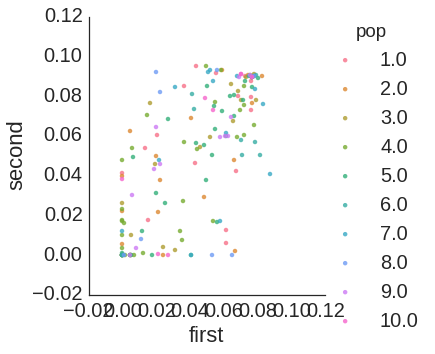

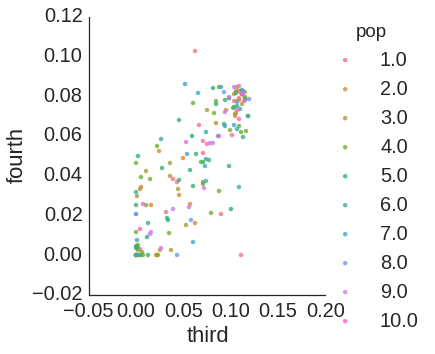

KeyError: "['sixth'] not in index"

In [101]:
sns.lmplot(data = comps, x = 'first', y = 'second', hue = 'pop', fit_reg=False)
plt.show()
sns.lmplot(data = comps, x = 'third', y = 'fourth', hue = 'pop', fit_reg=False)
plt.show()
sns.lmplot(data = comps, x = 'fifth', y = 'sixth', hue = 'pop', fit_reg=False)

In [ ]:
allele_matrix.values.astype(np.float)

In [ ]:
preprocessing.scale(lfmm_dom_in.values.astype(np.float))